# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22
...,...,...,...,...,...,...
1195,2024,December,South,Espresso,21111,8204.05
1196,2024,December,South,Lattes,8953,3452.85
1197,2024,December,South,Tea,18078,4329.57
1198,2024,December,South,Pastries,5685,1151.46


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


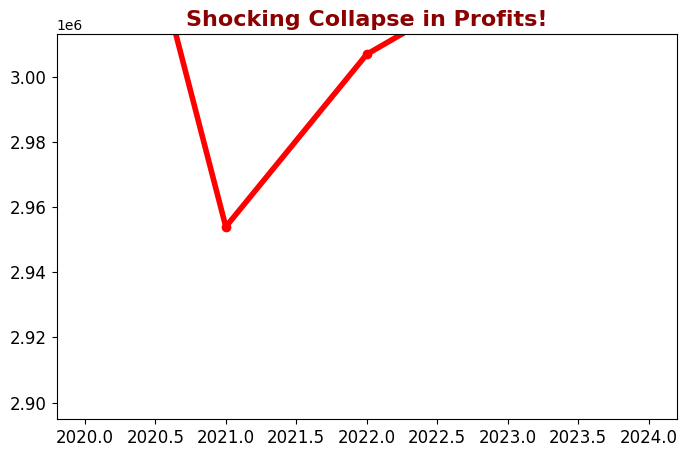

In [ ]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here: 
(double click to open this markdown cell and type into it)

This chart has no labels for the x or y axises. 
The line on the chart looks like it goes off of the chart and the data isn't displayed.
The title says there is a collapse in profits, but it looks like the numbers are rising.
What data rae they using to make this chart? Why the min?

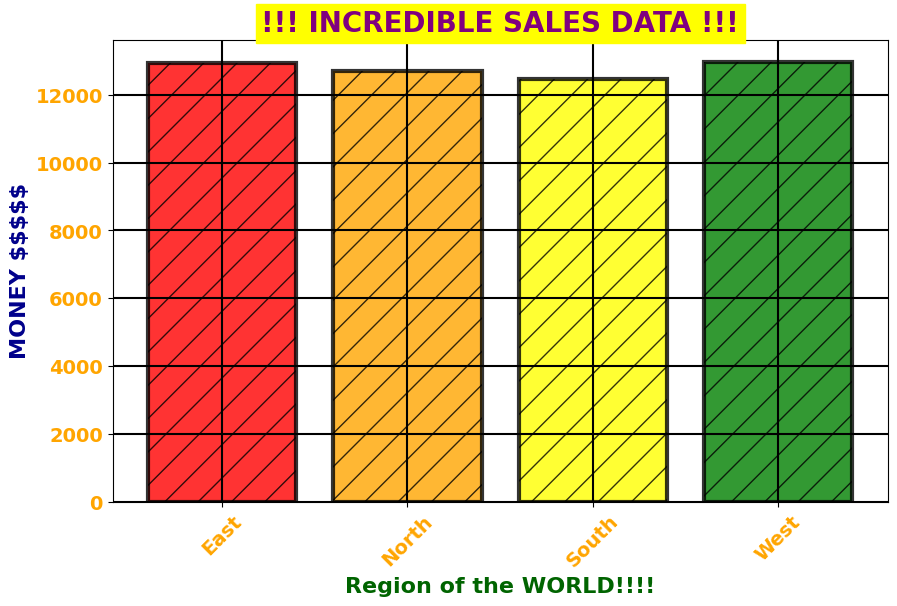

In [8]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
(double click to open this markdown cell and type into it)

What is this chart about?
It says Money on the y axis, but money from what? The $$$$ signs have to go.
The x axis label looks like it was written by a Boomer, as does the title. It just needs ,,,,, somewhere on it.
The chart is cluttered and improfessional looking.
The chart needs better data to compare, maybe a longer time frame?

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


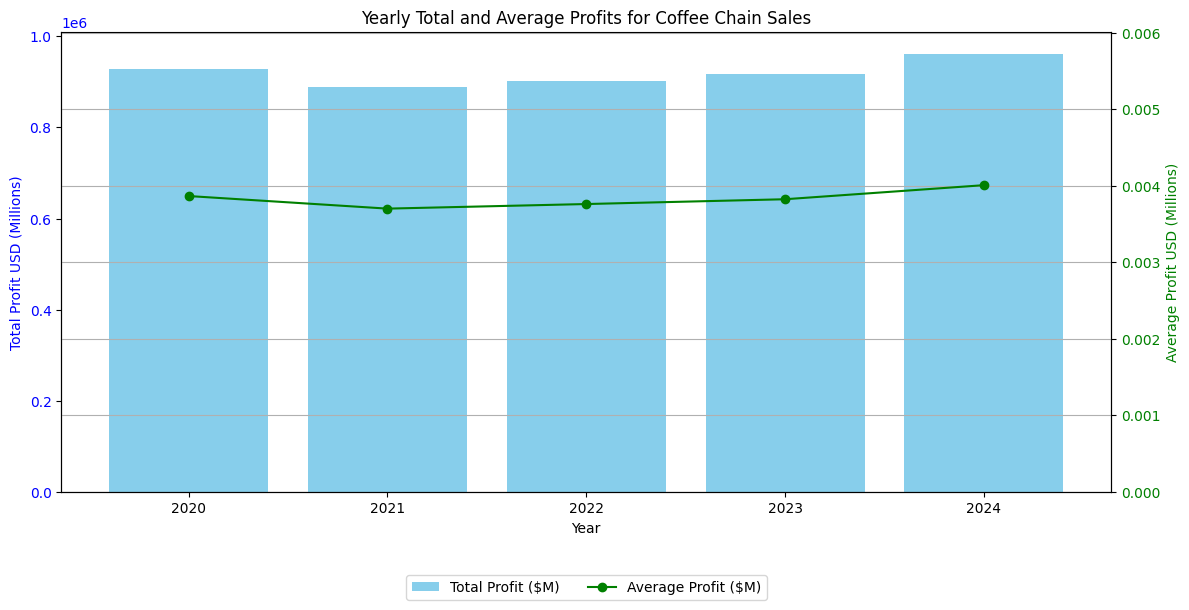

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# coffee sales data
df = pd.read_csv("fake_coffee_chain_sales.csv")

# group by
# I chose to group by the year and the profit, so to get the sum of all profits from each month into years
# I used .sum. But that didn't show enough data, so I added a second level as a bar chart with the average profit.
yearly_stats = df.groupby("Year")["Profit"].agg(Total_Profit="sum", Average_Profit="mean").reset_index()

#I converted the average profit to millions so both would match, since the left side was already in millions USD.
yearly_stats["Average_Profit_M"] = yearly_stats["Average_Profit"] / 1_000_000

fig, ax1 = plt.subplots(figsize=(12, 6))

# This is the total profit in millions USD in the background as a bar chart, so this total would include all of the 
# sums of each store/region.
ax1.bar(yearly_stats["Year"], yearly_stats["Total_Profit"], color='skyblue', label="Total Profit ($M)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Profit USD (Millions)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.spines['top'].set_visible(False)

# Here's the average profit in millions.
ax2 = ax1.twinx()
ax2.plot(yearly_stats["Year"], yearly_stats["Average_Profit_M"], marker='o', color='green', label="Average Profit ($M)")
ax2.set_ylabel("Average Profit USD (Millions)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax2.set_ylim(0, yearly_stats["Average_Profit_M"].max() * 1.5)

# Title
plt.title("Yearly Total and Average Profits for Coffee Chain Sales")

# Legends
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.subplots_adjust(bottom=0.25)
ax1.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

plt.grid(axis='y')
plt.tight_layout()

plt.show()

# I tried normalizing the y axises so that they both had the same scale with 1 as the highest amount, 
# but I decided that was somewhat confusing and the actual numbers were better.


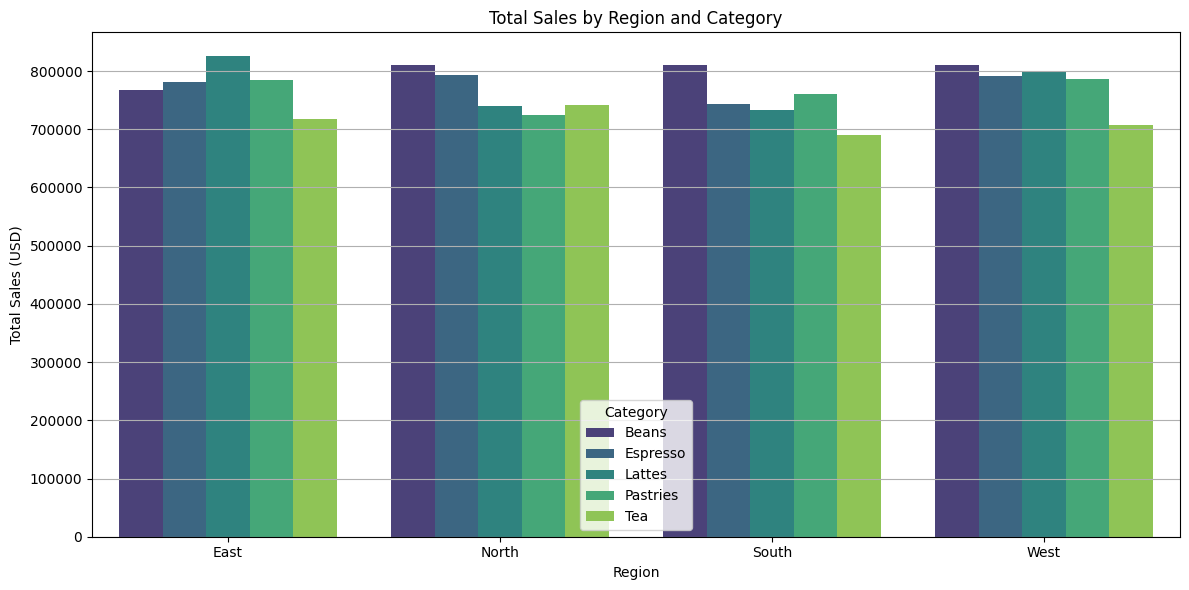

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# coffee sales data
df = pd.read_csv("fake_coffee_chain_sales.csv")

# Aggregate sales by Region and Category (sum of sales)
sales_summary = df.groupby(["Region", "Category"])["Sales"].sum().reset_index()

# Bar plot: Sales by Region and Category
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_summary, x="Region", y="Sales", hue="Category", palette="viridis")
plt.title("Total Sales by Region and Category")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.legend(title="Category")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
# I wanted to see which item made the most profit per year by region.

df = pd.read_csv("fake_coffee_chain_sales.csv")

# group by Year, Region, and Category to get total profit
profit_summary = df.groupby(["Year", "Region", "Category"])["Profit"].sum().reset_index()

# category with the max profit for each year and region...
idx = profit_summary.groupby(["Year", "Region"])["Profit"].idxmax()
most_profitable = profit_summary.loc[idx].reset_index(drop=True)

print(most_profitable)

    Year Region  Category    Profit
0   2020   East    Lattes  54087.79
1   2020  North    Lattes  52690.24
2   2020  South     Beans  56386.82
3   2020   West  Pastries  52165.31
4   2021   East  Espresso  49013.92
5   2021  North  Espresso  51871.02
6   2021  South     Beans  50372.89
7   2021   West       Tea  53060.14
8   2022   East  Espresso  51856.43
9   2022  North  Espresso  51528.78
10  2022  South     Beans  54567.62
11  2022   West    Lattes  49992.18
12  2023   East     Beans  55793.14
13  2023  North  Pastries  58074.51
14  2023  South    Lattes  45051.51
15  2023   West  Espresso  56036.15
16  2024   East  Pastries  52096.63
17  2024  North     Beans  55335.04
18  2024  South  Espresso  52410.81
19  2024   West     Beans  62360.10


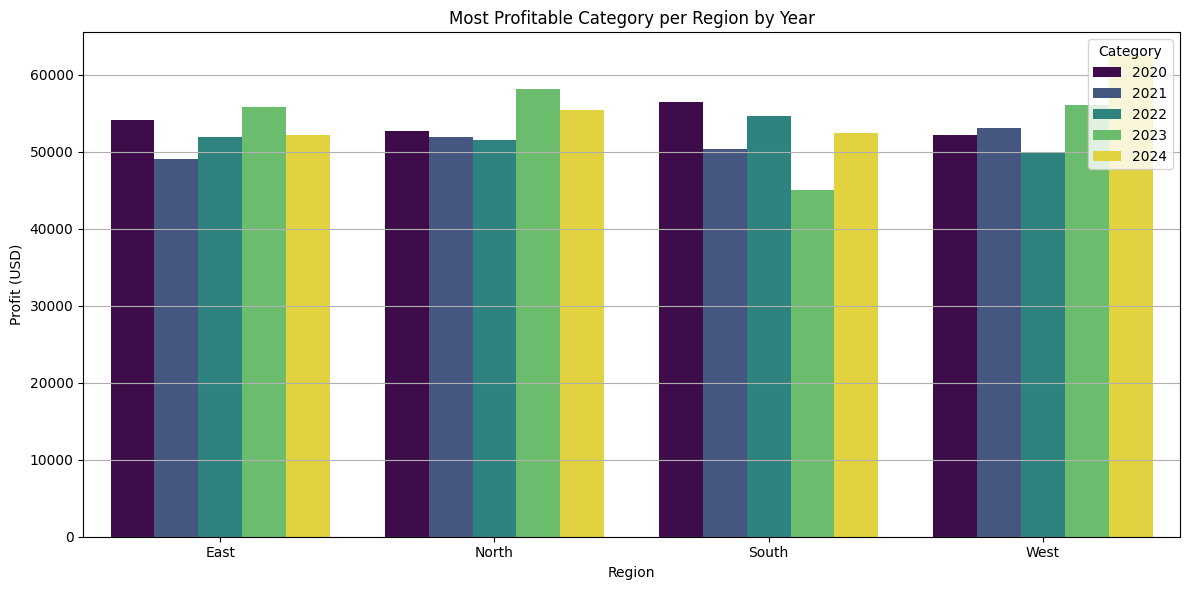

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("fake_coffee_chain_sales.csv")

# Group by Year, Region, and Category to get total profit
profit_summary = df.groupby(["Year", "Region", "Category"])["Profit"].sum().reset_index()

# Find the category with the max profit for each Year and Region
idx = profit_summary.groupby(["Year", "Region"])["Profit"].idxmax()
most_profitable = profit_summary.loc[idx].reset_index(drop=True)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=most_profitable, x="Region", y="Profit", hue="Year", palette="viridis")

plt.title("Most Profitable Category per Region by Year")
plt.xlabel("Region")
plt.ylabel("Profit (USD)")
plt.legend(title="Category")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# It looks like the higher sales of beans might correlate to higher profits.


In [62]:
import pandas as pd

# Load data
df = pd.read_csv("fake_coffee_chain_sales.csv")

# 1️⃣ Find the total profit per year and region
profit_summary = df.groupby(["Year", "Region"])["Profit"].sum().reset_index()

# 2️⃣ Find the year with the max profit for each region
idx_profit = profit_summary.groupby("Region")["Profit"].idxmax()
highest_profit_year = profit_summary.loc[idx_profit].reset_index(drop=True)
print("Highest Profit Year per Region:")
print(highest_profit_year)


Highest Profit Year per Region:
   Year Region     Profit
0  2023   East  249378.22
1  2024  North  250142.92
2  2022  South  231530.42
3  2024   West  263539.95


In [63]:
import pandas as pd

# Load data
df = pd.read_csv("fake_coffee_chain_sales.csv")

# Group by Category and calculate total sales and total profit
category_summary = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()

# Sort by total sales
category_summary = category_summary.sort_values("Sales", ascending=False)

print(category_summary)


   Category    Sales     Profit
0     Beans  3196300  945807.47
1  Espresso  3109057  926310.62
2    Lattes  3096026  934622.58
3  Pastries  3055565  905355.01
4       Tea  2856660  886586.34


In [65]:
# Group by Category and Year
category_year_summary = df.groupby(["Category", "Year"])[["Sales", "Profit"]].sum().reset_index()

print(category_year_summary)

    Category  Year   Sales     Profit
0      Beans  2020  620942  189685.69
1      Beans  2021  608624  174438.20
2      Beans  2022  655475  192876.95
3      Beans  2023  624307  183922.36
4      Beans  2024  686952  204884.27
5   Espresso  2020  639776  185543.47
6   Espresso  2021  625635  191867.98
7   Espresso  2022  623417  185991.57
8   Espresso  2023  586247  179986.79
9   Espresso  2024  633982  182920.81
10    Lattes  2020  661635  187223.82
11    Lattes  2021  578187  176064.18
12    Lattes  2022  610266  181768.75
13    Lattes  2023  609467  189480.68
14    Lattes  2024  636471  200085.15
15  Pastries  2020  651241  191652.61
16  Pastries  2021  542905  161459.30
17  Pastries  2022  557866  167843.74
18  Pastries  2023  656322  196056.17
19  Pastries  2024  647231  188343.19
20       Tea  2020  546989  173744.91
21       Tea  2021  598588  184543.59
22       Tea  2022  559845  174264.92
23       Tea  2023  555502  168367.03
24       Tea  2024  595736  185665.89


In [66]:
# Group by Category and Region
category_region_summary = df.groupby(["Category", "Region"])[["Sales", "Profit"]].sum().reset_index()

print(category_region_summary)

    Category Region   Sales     Profit
0      Beans   East  766976  224323.07
1      Beans  North  809822  242419.58
2      Beans  South  809752  243988.44
3      Beans   West  809750  235076.38
4   Espresso   East  782012  235415.27
5   Espresso  North  793399  235721.79
6   Espresso  South  742978  222407.40
7   Espresso   West  790668  232766.16
8     Lattes   East  825242  244068.78
9     Lattes  North  739747  233712.71
10    Lattes  South  732615  213365.98
11    Lattes   West  798422  243475.11
12  Pastries   East  784364  218095.81
13  Pastries  North  723713  219276.68
14  Pastries  South  760523  233004.82
15  Pastries   West  786965  234977.70
16       Tea   East  718419  222132.39
17       Tea  North  741215  229440.41
18       Tea  South  689666  201023.70
19       Tea   West  707360  233989.84


In [51]:
import pandas as pd

df = pd.read_csv("fake_coffee_chain_sales.csv")

# Total profit per region per year
profit_summary = df.groupby(["Region", "Year"])["Profit"].sum().reset_index()

# Year with max profit for each region
idx_max_profit = profit_summary.groupby("Region")["Profit"].idxmax()
highest_profit_year = profit_summary.loc[idx_max_profit].reset_index(drop=True)
highest_profit_year.rename(columns={"Year": "Year_Highest_Profit", "Profit": "Profit_Max"}, inplace=True)

print("Highest Profit Year per Region:")
print(highest_profit_year)


Highest Profit Year per Region:
  Region  Year_Highest_Profit  Profit_Max
0   East                 2023   249378.22
1  North                 2024   250142.92
2  South                 2022   231530.42
3   West                 2024   263539.95


In [67]:
# Just want to see beans
beans_sales = df[df["Category"] == "Beans"]

# Sum beans sales per region per year
beans_summary = beans_sales.groupby(["Region", "Year"])["Sales"].sum().reset_index()

# Year with max beans sales per region
idx_max_beans = beans_summary.groupby("Region")["Sales"].idxmax()
highest_beans_year = beans_summary.loc[idx_max_beans].reset_index(drop=True)
highest_beans_year.rename(columns={"Year": "Year_Highest_Beans", "Sales": "Beans_Sales_Max"}, inplace=True)

print("Highest Beans Sales Year per Region:")
print(highest_beans_year)

Highest Beans Sales Year per Region:
  Region  Year_Highest_Beans  Beans_Sales_Max
0   East                2023           181098
1  North                2024           188650
2  South                2021           175564
3   West                2024           193809


In [53]:
# Merge the two tables with Region data
comparison = pd.merge(highest_profit_year, highest_beans_year, on="Region")

# Check if the highest profit year matches highest bean sales year (well this is cool!)
comparison["Match"] = comparison["Year_Highest_Profit"] == comparison["Year_Highest_Beans"]

print(comparison)

  Region  Year_Highest_Profit  Profit_Max  Year_Highest_Beans  \
0   East                 2023   249378.22                2023   
1  North                 2024   250142.92                2024   
2  South                 2022   231530.42                2021   
3   West                 2024   263539.95                2024   

   Beans_Sales_Max  Match  
0           181098   True  
1           188650   True  
2           175564  False  
3           193809   True  


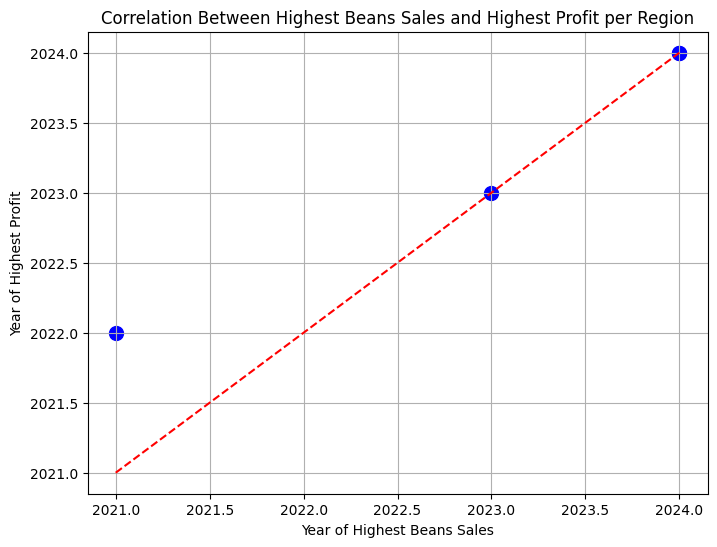

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(comparison["Year_Highest_Beans"], comparison["Year_Highest_Profit"], s=100, color='blue')
plt.plot([comparison["Year_Highest_Beans"].min(), comparison["Year_Highest_Beans"].max()],
         [comparison["Year_Highest_Beans"].min(), comparison["Year_Highest_Beans"].max()],
         color='red', linestyle='--')  # line y=x for perfect match
plt.xlabel("Year of Highest Beans Sales")
plt.ylabel("Year of Highest Profit")
plt.title("Correlation Between Highest Beans Sales and Highest Profit per Region")
plt.grid(True)
plt.show()

# I don't really like this one

In [77]:
import pandas as pd
import requests
from io import StringIO

# Load the original dataset
url = "https://raw.githubusercontent.com/CodeYouOrg/DA_M3_DataVizChallenge/main/fake_coffee_chain_sales.csv"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

# Highest profit year per region
profit_summary = df.groupby(["Region", "Year"])["Profit"].sum().reset_index()
idx_max_profit = profit_summary.groupby("Region")["Profit"].idxmax()
highest_profit_year = profit_summary.loc[idx_max_profit].reset_index(drop=True)
highest_profit_year.rename(columns={"Year": "Year_Highest_Profit", "Profit": "Profit_Max"}, inplace=True)

# which region had the higest bean sales per year?
beans_df = df[df["Category"] == "Beans"]
beans_summary = beans_df.groupby(["Region", "Year"])["Sales"].sum().reset_index()
idx_max_beans = beans_summary.groupby("Region")["Sales"].idxmax()
highest_beans_year = beans_summary.loc[idx_max_beans].reset_index(drop=True)
highest_beans_year.rename(columns={"Year": "Year_Highest_Beans", "Sales": "Beans_Sales_Max"}, inplace=True)

# combine the two into a df
summary_df = pd.merge(highest_profit_year, highest_beans_year, on="Region")

# Add match column
summary_df["Match"] = summary_df["Year_Highest_Profit"] == summary_df["Year_Highest_Beans"]

print(summary_df)


  Region  Year_Highest_Profit  Profit_Max  Year_Highest_Beans  \
0   East                 2023   249378.22                2023   
1  North                 2024   250142.92                2024   
2  South                 2022   231530.42                2021   
3   West                 2024   263539.95                2024   

   Beans_Sales_Max  Match  
0           181098   True  
1           188650   True  
2           175564  False  
3           193809   True  


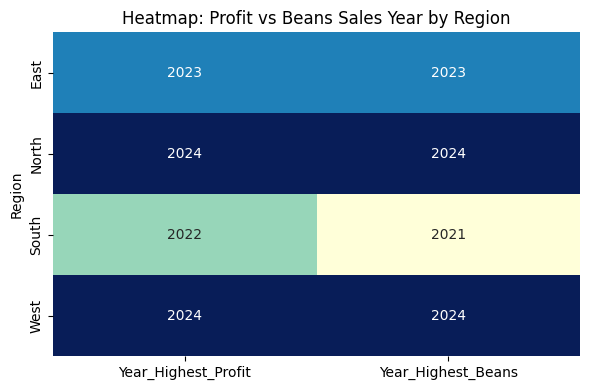

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# I decided to make a heatmap to give a clear dispaly of highest bean sales compared to the year of highest profit in each.
heatmap_data = summary_df[["Region", "Year_Highest_Profit", "Year_Highest_Beans"]].set_index("Region")

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=False, fmt="d")

plt.title("Heatmap: Profit vs Beans Sales Year by Region")
plt.tight_layout()
plt.show()
